In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Dense,Flatten

In [ ]:
data=[]
labels=[]
Parasitized=os.listdir("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((64, 64))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((64, 64))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [ ]:
Cells=np.array(data)
labels=np.array(labels)

In [ ]:
np.save("/content/drive/My Drive/Colab Notebooks/Cells64",Cells)
np.save("/content/drive/My Drive/Colab Notebooks/labels64",labels)

In [ ]:
Cells=np.load("/content/drive/My Drive/Colab Notebooks/Cells64.npy")
labels=np.load("/content/drive/My Drive/Colab Notebooks/labels64.npy")

In [ ]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [ ]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [ ]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [ ]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [ ]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [ ]:
model = Sequential()
inputShape = (64, 64, 3)
 
model.add(Conv2D(32, kernel_size=(3,3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(MaxPooling2D(pool_size=2))
 
model.add(Flatten())
model.add(Dense(4000))
model.add(Dense(2))
model.add(Activation("softmax"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_16 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 4000)              32772000  
_________________________________________________________________
dense_17 (Dense)             (None, 2)                

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x = x_train, y = y_train,
                    epochs = 20, validation_data = (x_test,y_test),
                    verbose = 1)

Epoch 1/20
776/776 [==============================] - 5s 7ms/step - loss: 0.6624 - accuracy: 0.7399 - val_loss: 0.4061 - val_accuracy: 0.8682
Epoch 2/20
776/776 [==============================] - 5s 7ms/step - loss: 0.3698 - accuracy: 0.8637 - val_loss: 0.3923 - val_accuracy: 0.8428
Epoch 3/20
776/776 [==============================] - 5s 7ms/step - loss: 0.3269 - accuracy: 0.8861 - val_loss: 0.3575 - val_accuracy: 0.8523
Epoch 4/20
776/776 [==============================] - 5s 7ms/step - loss: 0.3267 - accuracy: 0.8824 - val_loss: 0.3082 - val_accuracy: 0.8889
Epoch 5/20
776/776 [==============================] - 5s 7ms/step - loss: 0.3142 - accuracy: 0.8928 - val_loss: 0.3809 - val_accuracy: 0.8646
Epoch 6/20
776/776 [==============================] - 5s 7ms/step - loss: 0.3048 - accuracy: 0.8944 - val_loss: 0.3326 - val_accuracy: 0.8795
Epoch 7/20
776/776 [==============================] - 5s 7ms/step - loss: 0.2964 - accuracy: 0.9011 - val_loss: 0.3459 - val_accuracy: 0.8697
Epoch 

In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/Shallownet_adam64/ShallowNetAdam64.h5")

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

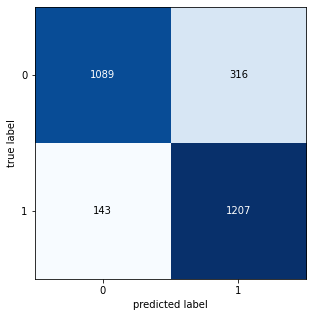

In [ ]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()